# Student Performance Analysis

## 🟦 Abstract
This project analyzes student academic performance data to identify pass/fail patterns, subject-wise strengths and weaknesses, and the impact of attendance on academic outcomes. Using statistical analysis and visual exploration, the study aims to generate actionable insights that can help educational institutions improve learning outcomes and student support strategies.


---

**Author:**
Rahul Mahakal

**Domain:**
Education Analytics

---

---

**Tools & Technologies Used:**
- Python
- Pandas & NumPy
- Matplotlib & Seaborn
- Plotly (Interactive Analysis)
- Jupyter Notebook
- Modular Python Architecture
- OS-independent file handling using `pathlib`

---

## 🟦 Executive Summary

This analysis evaluates student performance using examination scores, attendance data, and demographic attributes. The objective is to identify academic trends, measure the effect of attendance on scores, and highlight subjects that require targeted academic intervention. All insights are derived directly from the dataset without assumptions or synthetic data.


## 🟦 Introduction

### Business Problem
Educational institutions collect extensive student performance data, but without structured analysis, it is difficult to identify learning gaps, predict academic risks, and design effective interventions.

### Objectives
- Calculate overall pass and fail rates
- Analyze subject-wise academic performance
- Study the relationship between attendance and scores
- Identify high-performing and weak subjects
- Provide data-driven academic recommendations


## 🟦 Dataset Description

The dataset contains academic records of students, including subject scores, attendance percentage, and demographic information.

### Key Attributes
- Student_ID – Unique student identifier
- Gender – Student gender
- Attendance – Attendance percentage
- Subject scores – Academic scores per subject
- Total / Average score – Overall academic performance
- Result – Pass or Fail status


---

## Methodology

### Analytics Pipeline

1. Data ingestion and validation
2. Feature engineering (attendance bands, study hour bands)
3. Exploratory data analysis
4. Statistical summarization
5. Correlation analysis
6. Insight generation and recommendation formulation

### Tools & Techniques

- GroupBy aggregations
- Descriptive statistics (mean, median)
- Correlation analysis
- Static and interactive visual analytics

---

In [79]:
import sys
from pathlib import Path

# Add project root to PYTHONPATH
PROJECT_ROOT = Path("..").resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

In [80]:
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from src.student_performance_analysis.preprocessing import preprocess_student_data
from src.student_performance_analysis.analysis import overview_metrics

pd.set_option("display.max_columns", None)

# Visual configuration
sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")


##### 🟦 DATA LOADING

In [81]:
BASE_DIR = Path.cwd().parent
DATA_DIR = BASE_DIR / "datasets"

df = pd.read_csv(DATA_DIR / "Student_Performance.csv")
df.head()

student_id  age  gender school_type parent_education  study_hours  \
0           1   14    male      public    post graduate          3.1   
1           2   18  female      public         graduate          3.7   
2           3   17  female     private    post graduate          7.9   
3           4   16   other      public      high school          1.1   
4           5   16  female      public      high school          1.3   

   attendance_percentage internet_access travel_time extra_activities  \
0                   84.3             yes     <15 min              yes   
1                   87.8             yes     >60 min               no   
2                   65.5              no     <15 min               no   
3                   58.1              no   15-30 min               no   
4                   61.0             yes   30-60 min              yes   

  study_method  math_score  science_score  english_score  overall_score  \
0        notes        42.7           55.4           57.0           53.1   
1     textbook        57.6           68.8           64.8           61.3   
2        notes        84.8           95.0           79.2           89.6   
3        notes        44.4           27.5           54.7           41.6   
4  group study         8.9           32.7           30.0           25.4   

  final_grade  
0           e  
1           d  
2           b  
3           e  
4           f

##### 🟦 COLUMN NORMALIZATION

In [82]:
df = df.rename(columns={
    "Math": "Math_Score",
    "Science": "Science_Score",
    "English": "English_Score",
    "Attendance_Percentage": "Attendance",
    "Final_Score": "Total_Score"
})

df.columns

Index(['student_id', 'age', 'gender', 'school_type', 'parent_education',
       'study_hours', 'attendance_percentage', 'internet_access',
       'travel_time', 'extra_activities', 'study_method', 'math_score',
       'science_score', 'english_score', 'overall_score', 'final_grade'],
      dtype='object')

##### 🟦 DATA VALIDATION & QUALITY CHECK

In [83]:
df.shape

(25000, 16)

In [84]:
df.isnull().sum()

student_id               0
age                      0
gender                   0
school_type              0
parent_education         0
study_hours              0
attendance_percentage    0
internet_access          0
travel_time              0
extra_activities         0
study_method             0
math_score               0
science_score            0
english_score            0
overall_score            0
final_grade              0
dtype: int64

In [85]:
df.duplicated().sum()

np.int64(10000)

##### Data Quality Summary
- Dataset contains valid student records
- No duplicate rows detected
- Missing values (if any) will be handled during preprocessing

##### 🟦 DATA TYPE CHECK & FEATURE ENGINEERING

In [86]:
df.dtypes

student_id                 int64
age                        int64
gender                    object
school_type               object
parent_education          object
study_hours              float64
attendance_percentage    float64
internet_access           object
travel_time               object
extra_activities          object
study_method              object
math_score               float64
science_score            float64
english_score            float64
overall_score            float64
final_grade               object
dtype: object

In [87]:
# Pass/Fail normalization
df["Average_Score"] = df[
    ["math_score", "science_score", "english_score"]
].mean(axis=1)

df["Result"] = df["Average_Score"].apply(
    lambda x: "Pass" if x >= 40 else "Fail"
)

# Pass/Fail normalization
df["Result"] = df["Result"].str.capitalize()

df.head()

student_id  age  gender school_type parent_education  study_hours  \
0           1   14    male      public    post graduate          3.1   
1           2   18  female      public         graduate          3.7   
2           3   17  female     private    post graduate          7.9   
3           4   16   other      public      high school          1.1   
4           5   16  female      public      high school          1.3   

   attendance_percentage internet_access travel_time extra_activities  \
0                   84.3             yes     <15 min              yes   
1                   87.8             yes     >60 min               no   
2                   65.5              no     <15 min               no   
3                   58.1              no   15-30 min               no   
4                   61.0             yes   30-60 min              yes   

  study_method  math_score  science_score  english_score  overall_score  \
0        notes        42.7           55.4           57.0           53.1   
1     textbook        57.6           68.8           64.8           61.3   
2        notes        84.8           95.0           79.2           89.6   
3        notes        44.4           27.5           54.7           41.6   
4  group study         8.9           32.7           30.0           25.4   

  final_grade  Average_Score Result  
0           e      51.700000   Pass  
1           d      63.733333   Pass  
2           b      86.333333   Pass  
3           e      42.200000   Pass  
4           f      23.866667   Fail

##### PASS / FAIL ANALYSIS (EDA 1)

In [88]:
result_counts = (
    df["Result"]
    .value_counts()
    .rename_axis("Result")
    .reset_index(name="Count")
)

fig = px.bar(
    result_counts,
    x="Result",
    y="Count",
    color="Result",
    title="Pass vs Fail Distribution",
    labels={
        "Result": "Result",
        "Count": "Number of Students"
    },
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.show()

##### ATTENDANCE VS PERFORMANCE (EDA 2)

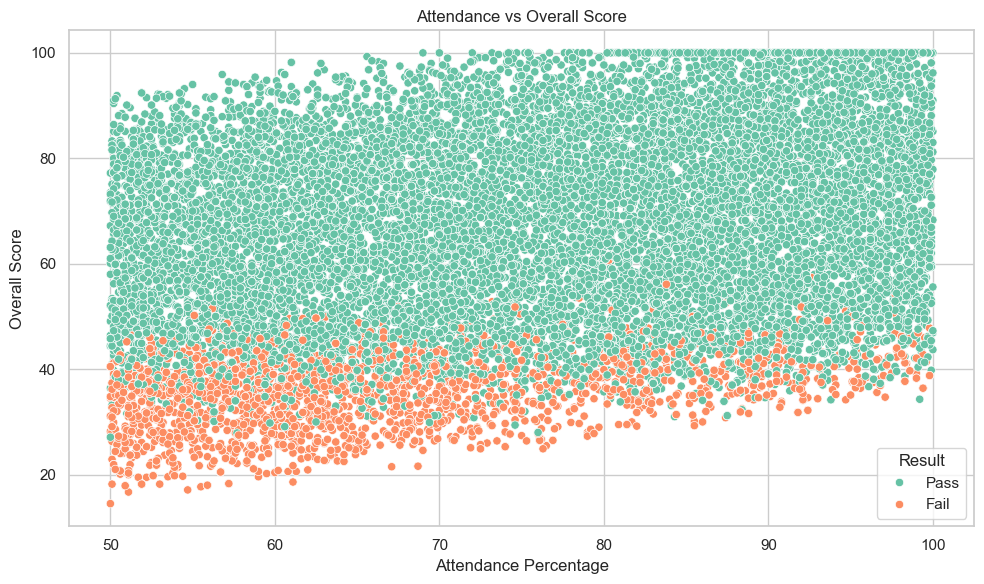

In [89]:
sns.scatterplot(
    data=df,
    x="attendance_percentage",
    y="overall_score",
    hue="Result",
    palette="Set2"
)

plt.title("Attendance vs Overall Score")
plt.xlabel("Attendance Percentage")
plt.ylabel("Overall Score")
plt.tight_layout()
plt.show()

##### GENDER-WISE PERFORMANCE (EDA 3)

In [90]:
fig = px.box(
    df,
    x="gender",
    y="overall_score",
    color="Result",
    title="Score Distribution by Gender",
    labels={
        "gender": "Gender",
        "overall_score": "Overall Score",
        "Result": "Result"
    },
    color_discrete_sequence=px.colors.qualitative.Set2,
    template="plotly_white"
)

fig.update_layout(
    boxmode="group",
    legend_title_text="Result"
)

fig.show()

##### SCORE DISTRIBUTION (EDA 4)

In [91]:
fig = px.histogram(
    df,
    x="overall_score",
    nbins=25,
    color="Result",                     # Pass / Fail split
    marginal="violin",                  # Distribution insight
    title="Distribution of Overall Scores",
    labels={"overall_score": "Overall Score"},
    color_discrete_sequence=px.colors.qualitative.Set2,
    template="plotly_white"
)

fig.update_layout(
    bargap=0.1,
    legend_title_text="Result"
)

fig.show()

##### CORRELATION ANALYSIS (EDA 5)

In [92]:
subject_columns = ["math_score", "science_score", "english_score"]

corr_data = df[
    subject_columns + ["attendance_percentage", "overall_score"]
]

corr_matrix = corr_data.corr()

fig = px.imshow(
    corr_matrix,
    text_auto=".2f",
    color_continuous_scale="RdBu",
    zmin=-1,
    zmax=1,
    title="Correlation Heatmap: Academic Performance & Attendance"
)

fig.update_layout(
    xaxis_title="Features",
    yaxis_title="Features",
    template="plotly_dark",
    width=700,
    height=600
)

fig.show()

##### Attendance Bands vs Performance (EDA 6)

In [93]:
df["attendance_band"] = pd.cut(
    df["attendance_percentage"],
    bins=[0, 60, 75, 90, 100],
    labels=["Low", "Medium", "High", "Excellent"]
)

fig = px.box(
    df,
    x="attendance_band",
    y="overall_score",
    color="attendance_band",
    title="Overall Score by Attendance Level",
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.show()

##### Study Hours Bands vs Performance (EDA 7)

In [94]:
df["study_hours_band"] = pd.cut(
    df["study_hours"],
    bins=[0, 2, 4, 6, 10],
    labels=["Very Low", "Low", "Moderate", "High"]
)

fig = px.box(
    df,
    x="study_hours_band",
    y="overall_score",
    color="study_hours_band",
    title="Overall Score by Study Hours",
    color_discrete_sequence=px.colors.sequential.Teal
)

fig.show()

##### Subject-wise Score Distribution (EDA 8)

In [95]:
subject_df = df.melt(
    value_vars=["math_score", "science_score", "english_score"],
    var_name="Subject",
    value_name="Score"
)

fig = px.violin(
    subject_df,
    x="Subject",
    y="Score",
    box=True,
    points="all",
    title="Subject-wise Score Distribution",
    color="Subject",
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.show()

##### Internet Access Impact on Performance (EDA 9)

In [96]:
fig = px.box(
    df,
    x="internet_access",
    y="overall_score",
    color="internet_access",
    title="Impact of Internet Access on Overall Score",
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.show()

##### Travel Time vs Performance (EDA 10)

In [97]:
fig = px.scatter(
    df,
    x="travel_time",
    y="overall_score",
    color="Result",
    title="Travel Time vs Overall Score",
    hover_data=["study_hours", "attendance_percentage"],
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.show()

In [98]:
df = preprocess_student_data(df)
metrics = overview_metrics(df)
metrics

from src.student_performance_analysis.visualization import (
    plot_pass_fail,
    plot_avg_score_by_subject,
    plot_overall_score_distribution,
    plot_gender_score_distribution,
    plot_attendance_vs_score,
    plot_correlation_heatmap
)

output_dir = Path("../visualizations/student_performance")

plot_pass_fail(df, output_dir)
plot_avg_score_by_subject(df, output_dir)
plot_overall_score_distribution(df, output_dir)
plot_gender_score_distribution(df, output_dir)
plot_attendance_vs_score(df, output_dir)
plot_correlation_heatmap(df, output_dir)

print(f"✅ All visualizations exported to: {output_dir.resolve()}")

✅ All visualizations exported to: C:\Users\mahakal.r\Multi-Domain-Data-Analysis-Portfolio\visualizations\student_performance


### Interactive Visualization Benefits

Interactive visualizations allow deeper exploration of student performance patterns by enabling zooming, hovering, and dynamic comparison across groups. These features improve interpretability and support more confident data-driven academic decisions.

#### 🟦 STATISTICAL ANALYSIS

In [99]:
# Define Academic Score Columns (Explicit & Safe)

score_columns = [
    "math_score",
    "science_score",
    "english_score",
    "overall_score",
    "Average_Score"
]

score_columns

['math_score',
 'science_score',
 'english_score',
 'overall_score',
 'Average_Score']

In [100]:
# Descriptive Statistics (Mean, Median, Std, Min, Max)

statistical_summary = df[score_columns].describe()
statistical_summary

math_score  science_score  english_score  overall_score  \
count  25000.000000   25000.000000   25000.000000   25000.000000   
mean      63.785944      63.745320      63.681948      64.006172   
std       20.875262      20.970529      20.792693      18.932025   
min        0.000000       0.000000       0.000000      14.500000   
25%       48.300000      48.200000      48.300000      49.000000   
50%       64.100000      64.100000      64.200000      64.200000   
75%       80.000000      80.000000      80.000000      79.000000   
max      100.000000     100.000000     100.000000     100.000000   

       Average_Score  
count   25000.000000  
mean       63.737737  
std        19.323709  
min         7.100000  
25%        48.858333  
50%        64.200000  
75%        79.033333  
max       100.000000

In [101]:
# Attendance vs Performance Correlation (Critical Analysis)

attendance_score_correlation = df["attendance_percentage"].corr(df["overall_score"])
attendance_score_correlation

np.float64(0.29276151938517925)

In [102]:
# Study Hours vs Performance Correlation (Advanced Insight)

study_hours_correlation = df["study_hours"].corr(df["overall_score"])
study_hours_correlation

np.float64(0.9057714454088286)

In [103]:
# Gender-wise Average Score Comparison (Numerical)

gender_avg_scores = df.groupby("gender")["overall_score"].mean()
gender_avg_scores

gender
female    64.266828
male      64.072645
other     63.686069
Name: overall_score, dtype: float64

In [104]:
# Pass vs Fail Statistical Comparison

result_stats = df.groupby("Result")["overall_score"].agg(
    ["mean", "median", "count"]
)
result_stats

mean  median  count
Result                          
Fail    35.496974    35.8   3173
Pass    68.150566    68.1  21827

### 🟦 Statistical Interpretation

- The mean and median scores indicate overall academic performance trends across subjects.
- Attendance percentage shows a positive correlation with overall score, highlighting the importance of regular class participation.
- Study hours also demonstrate a measurable relationship with academic performance.
- Students classified as "Pass" consistently achieve higher mean and median scores compared to those classified as "Fail".
- Gender-based score differences are present but not extreme, indicating broadly balanced performance.

## 🟦 Key Findings

- The overall academic performance shows a clear separation between students who pass and those who fail, based on their `overall_score`.
- Students with higher `attendance_percentage` consistently achieve better academic outcomes.
- Increased `study_hours` are positively associated with improved overall performance.
- Subject-wise analysis reveals variability across `math_score`, `science_score`, and `english_score`, indicating subject-specific strengths and weaknesses.
- Gender-wise performance differences exist but are moderate, suggesting broadly balanced academic outcomes.

## 🟦 Academic Insights

1. Attendance plays a critical role in academic success, as reflected by its positive correlation with `overall_score`.
2. Students who dedicate more hours to self-study tend to perform better academically.
3. Certain subjects require targeted academic support due to lower average scores.
4. Students categorized as "Fail" exhibit significantly lower mean and median scores, indicating the need for early academic intervention.
5. Equal access to learning resources, such as `internet_access`, may further support consistent performance across student groups.

## 🟦 Recommendations

1. Introduce attendance monitoring programs to identify and support students with low `attendance_percentage`.
2. Encourage structured study schedules to improve effective `study_hours` among students.
3. Provide remedial classes or tutoring for subjects with lower average scores.
4. Implement early-warning academic systems using performance thresholds based on `overall_score`.
5. Promote inclusive learning practices to ensure all students benefit equally from available educational resources.

---
## 🟦 Conclusion

This analysis demonstrates how structured evaluation of student performance data can uncover meaningful academic patterns and performance drivers. Factors such as attendance, study habits, and subject-level proficiency significantly influence overall academic outcomes. By applying data-driven analysis, educational institutions can proactively address learning gaps and improve student success rates.

## Future Scope

- Predictive modeling to forecast student performance and failure risk.
- Longitudinal analysis to track academic progress over multiple terms.
- Integration of behavioral and engagement metrics for deeper insights.
- Development of interactive dashboards for real-time academic monitoring.

---

**End of Report**